## **2.3.4.5. Data Identification & Acquisition & Extraction & Validation & Cleansing**
- Berikan pemahaman mahasiswa mengenai karakteristik 3 data tersebut, definisikan atribut datanya.
- Implementasikan tahapan pengambilan data dari sumber online data tersebut menuju penyimpanan 
lokal
- Implementasikan proses pengambilan data dari json, csv, dan pdf menjadi Data Frame Spark
- Implementasikan proses perapihan yang diperlukan terhadap masing-masing data.

#### **Persiapan Pyspark**

In [551]:
# Import Spark Session dari modul pyspark
from pyspark.sql import SparkSession

# Inisiasi & jalankan spark session
spark = SparkSession.builder.appName("UTS Praktikum Big Data").getOrCreate()

#### **Pengolahan Data 1** : *rekap-jumlah-status-desa-provinsi-kalimantan-barat-tahun-2019.csv* 

##### **CSV to Dataframe Spark**

In [552]:
data_csv = spark.read.options(delimiter=";", header=True).csv("data/rekap-jumlah-status-desa-provinsi-kalimantan-barat-tahun-2019.csv", inferSchema=True)
data_csv.show()

+----------------+-------+----+----------+----------+-----------------+
|       Kabupaten|Mandiri|Maju|Berkembang|Tertinggal|Sangat Tertinggal|
+----------------+-------+----+----------+----------+-----------------+
|   Kab Pontianak|     16|  35|         7|         2|                0|
|   Kab Kubu Raya|     14|  21|        51|        30|                1|
|      Kab Sambas|      8|  29|       108|        45|                3|
|  Kab Bengkayang|      3|   6|        63|        48|                2|
|      Kab Landak|      3|   8|        20|        99|               26|
|     Kab Sanggau|      5|  19|        66|        73|                0|
|     Kab Sekadau|      4|   6|        30|        43|                4|
|     Kab Sintang|      6|  14|       104|       180|               86|
|      Kab Melawi|      4|   3|        32|        83|               47|
|      Kab K Hulu|      8|  23|       169|        75|                3|
|    Kab Ketapang|     12|  18|        91|        96|           

#### **Pengolahan Data 2** : *daftar_desa_dan_kelurahan.json* 

##### **Akuisisi Data**

In [553]:
# merubah file json menjadi struktur data dictionary
import json
with open("data/daftar_desa_dan_kelurahan.json") as json_file:
    data_json_raw = json.load(json_file)

##### **Analisis Struktur Data**

In [554]:
for item in data_json_raw["fields"]:
    print(
        type(item), #dictionary
    )

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


In [555]:
for item in data_json_raw["records"]:
    print(
        type(item), #list
        item[3]
    )

<class 'list'> SELAKAU
<class 'list'> SELAKAU
<class 'list'> SELAKAU
<class 'list'> SELAKAU
<class 'list'> SELAKAU
<class 'list'> SELAKAU
<class 'list'> SELAKAU
<class 'list'> SELAKAU
<class 'list'> SELAKAU
<class 'list'> SELAKAU
<class 'list'> SELAKAU
<class 'list'> SELAKAU TIMUR
<class 'list'> SELAKAU TIMUR
<class 'list'> SELAKAU TIMUR
<class 'list'> SELAKAU TIMUR
<class 'list'> PEMANGKAT
<class 'list'> PEMANGKAT
<class 'list'> PEMANGKAT
<class 'list'> PEMANGKAT
<class 'list'> PEMANGKAT
<class 'list'> PEMANGKAT
<class 'list'> PEMANGKAT
<class 'list'> PEMANGKAT
<class 'list'> SEMPARUK
<class 'list'> SEMPARUK
<class 'list'> SEMPARUK
<class 'list'> SEMPARUK
<class 'list'> SEMPARUK
<class 'list'> SALATIGA
<class 'list'> SALATIGA
<class 'list'> SALATIGA
<class 'list'> SALATIGA
<class 'list'> SALATIGA
<class 'list'> TEBAS
<class 'list'> TEBAS
<class 'list'> TEBAS
<class 'list'> TEBAS
<class 'list'> TEBAS
<class 'list'> TEBAS
<class 'list'> TEBAS
<class 'list'> TEBAS
<class 'list'> TEBAS
<c

##### **Proses Cleansing**

In [702]:
my_dict = dict()
key_list = list()
result_list = list()

# inisiasi key pada dictionary
for key in data_json_raw["fields"]:
    my_dict[key["id"]] = ""
    key_list.append(key["id"])

# menyusun manual file dengan format .json
# hapus seluruh isi file
with open("data/clean_result.json", "w") as file:
    file.write("")

# tambahkan karakter [ pada awal file
with open("data/clean_result.json", "a") as file:
    file.write("[")

# inisiasi value setiap key pada dictionary
for i, value in enumerate(data_json_raw["records"]):
    for j in range(len(value)):
        my_dict[key_list[j]] = value[j]
    with open("data/clean_result.json", "a") as file:
        json.dump(my_dict, file)
        if not i+1 == len(data_json_raw["records"]): # jika ini bukan merupakan item terakhir pada dictionary
            file.write(",")

# tambahkan karakter ] pada akhir file
with open("data/clean_result.json", "a") as file:
    file.write("]") 

{'_id': '', 'Provinsi': '', 'Kabupaten/Kota': '', 'Kecamatan': '', 'Status': '', 'Desa/Kelurahan': '', 'Desa/Kelurahan Terluar': '', 'Tipologi': '', 'Luas (Ha)': '', 'Koordinat Bujur': '', 'Koordinat Lintang': '', 'Ketinggian DPL (M)': '', 'Lokasi': ''}


##### **JSON to Dataframe Spark**

In [557]:
data_json = spark.read.option("multiline", "true").json("data/clean_result.json")

#### **Pengolahan Data 3** : *lembaga-kemasyarakatan-desa.pdf* 

##### **Akuisisi Data**

In [558]:
import camelot
import tabula
import pandas as pd
data_pdf_raw = tabula.read_pdf("data/lembaga-kemasyarakatan-desa.pdf") #PDF to Dataframe Pandas

'pages' argument isn't specified.Will extract only from page 1 by default.


##### **Analisis Struktur Data**

In [559]:
print(
    type(data_pdf_raw), "\n",
    type(data_pdf_raw[0])
)

<class 'list'> 
 <class 'pandas.core.frame.DataFrame'>


##### **Proses Cleansing**

In [560]:
# menambil dataframe pada list
data_pdf = data_pdf_raw[0]

In [561]:
# menampilkan semua kolom dan baris
data_pdf 

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Jenis Lembaga Kemasyarakatan Desa (Pasal 6),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,...,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,No,Nama Kabupaten,RT,RW,PKK,Karang Taruna,Posyandu,LPM,Kelompok Tani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,RT,Pengurus,RW,Pengurus,PKK,Pengurus,Karang Taruna,Pengurus,...,Pengurus,Kader,LPM,Pengurus,Kelompok,Pengurus,Kelompok,Pengurus,NaN,NaN
2,NaN,1,SAMBAS,588,552,214,186,196,390,206,...,73,175,"2,857",184,214,121,579,23,13.0,NaN
3,NaN,2,MEMPAWAH,932,"1,180",274,326,55,"1,175",42,...,208,766,"1,141",74,344,295,"1,581",13,35.0,NaN
4,NaN,3,SANGGAU,"1,952","1,978",82,82,157,347,5,...,65,142,"2,592",133,97,0,10,0,0.0,NaN
5,NaN,4,KETAPANG,"1,592",473,41,65,170,"1,590",169,...,516,"1,056","2,603",238,871,134,550,1,20.0,NaN
6,NaN,5,SINTANG,"1,987",526,34,34,159,446,36,...,48,111,"1,518",0,0,17,125,1,3.0,NaN
7,NaN,6,KAPUAS HULU,"1,476","1,489",0,0,265,"4,016",180,...,414,"1,232","2,161",277,"1,118",246,637,7,45.0,NaN
8,NaN,7,BENGKAYANG,79,94,0,0,5,56,4,...,21,79,"1,349",107,0,0,0,1,39.0,NaN
9,NaN,8,LANDAK,517,355,72,5,541,360,0,...,557,536,"2,558",104,0,157,273,0,0.0,NaN


In [562]:
# menyeleksi baris total keseluruhan data
data_pdf_total_keseluruhan = data_pdf.iloc[-1, 2:-1] #[row, col]
data_pdf_total_keseluruhan

Unnamed: 2                                     14,662
Jenis Lembaga Kemasyarakatan Desa (Pasal 6)    12,084
Unnamed: 3                                      1,720
Unnamed: 4                                      1,134
Unnamed: 5                                      2,077
Unnamed: 6                                     11,996
Unnamed: 7                                        914
Unnamed: 8                                      5,348
Unnamed: 9                                      2,568
Unnamed: 10                                     6,350
Unnamed: 11                                    21,079
Unnamed: 12                                     1,476
Unnamed: 13                                     3,344
Unnamed: 14                                     1,784
Unnamed: 15                                     6,685
Unnamed: 16                                        53
Unnamed: 17                                       193
Unnamed: 18                                       NaN
Name: 14, dtype: object

In [563]:
# menyeleksi seluruh isi data kecuali nomor dan total keseluruhan data
data_pdf_isi = data_pdf.iloc[2:-1, 2:-1] #[row, col]
data_pdf_isi

,Unnamed: 2,Jenis Lembaga Kemasyarakatan Desa (Pasal 6),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
2,SAMBAS,588,552,214,186,196,390,206,412,73,175,"2,857",184,214,121,579,23,13.0
3,MEMPAWAH,932,"1,180",274,326,55,"1,175",42,636,208,766,"1,141",74,344,295,"1,581",13,35.0
4,SANGGAU,"1,952","1,978",82,82,157,347,5,81,65,142,"2,592",133,97,0,10,0,0.0
5,KETAPANG,"1,592",473,41,65,170,"1,590",169,907,516,"1,056","2,603",238,871,134,550,1,20.0
6,SINTANG,"1,987",526,34,34,159,446,36,240,48,111,"1,518",0,0,17,125,1,3.0
7,KAPUAS HULU,"1,476","1,489",0,0,265,"4,016",180,"1,426",414,"1,232","2,161",277,"1,118",246,637,7,45.0
8,BENGKAYANG,79,94,0,0,5,56,4,64,21,79,"1,349",107,0,0,0,1,39.0
9,LANDAK,517,355,72,5,541,360,0,0,557,536,"2,558",104,0,157,273,0,0.0
10,SEKADAU,937,787,249,221,165,717,125,276,163,336,949,54,92,197,660,1,10.0
11,MELAWI,"1,204","1,204",33,6,169,"1,352",76,253,191,788,807,85,110,157,302,1,0.0


In [564]:
print(
    len(data_pdf_isi.columns), "\n",
    data_pdf_isi.columns
)

18 
 Index(['Unnamed: 2', 'Jenis Lembaga Kemasyarakatan Desa (Pasal 6)',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')


In [565]:
# menamai ulang kolom kolom pada dataframe
data_pdf_isi.columns = [
    "Kabupaten",
    "Jumlah RT",
    "Total Pengurus RT",
    "Jumlah RW",
    "Total Pengurus RW",
    "Jumlah PKK",
    "Total Pengurus PKK",
    "Jumlah Karang Taruna",
    "Total Pengurus Karang Taruna",
    "Jumlah Posyandu",
    "Total Pengurus Posyandu",
    "Total Kader Posyandu",
    "Jumlah LPM",
    "Total Pengurus LPM",
    "Jumlah Tani",
    "Total Pengurus Tani",
    "Jumlah Sadar Wisata",
    "Total Pengurus Sadar Wisata",
]

In [566]:
data_pdf_isi = data_pdf_isi.reset_index(drop=True) # reset index pada dataframe
data_pdf_isi # menampilkan data

,Kabupaten,Jumlah RT,Total Pengurus RT,Jumlah RW,Total Pengurus RW,Jumlah PKK,Total Pengurus PKK,Jumlah Karang Taruna,Total Pengurus Karang Taruna,Jumlah Posyandu,Total Pengurus Posyandu,Total Kader Posyandu,Jumlah LPM,Total Pengurus LPM,Jumlah Tani,Total Pengurus Tani,Jumlah Sadar Wisata,Total Pengurus Sadar Wisata
0,SAMBAS,588,552,214,186,196,390,206,412,73,175,"2,857",184,214,121,579,23,13.0
1,MEMPAWAH,932,"1,180",274,326,55,"1,175",42,636,208,766,"1,141",74,344,295,"1,581",13,35.0
2,SANGGAU,"1,952","1,978",82,82,157,347,5,81,65,142,"2,592",133,97,0,10,0,0.0
3,KETAPANG,"1,592",473,41,65,170,"1,590",169,907,516,"1,056","2,603",238,871,134,550,1,20.0
4,SINTANG,"1,987",526,34,34,159,446,36,240,48,111,"1,518",0,0,17,125,1,3.0
5,KAPUAS HULU,"1,476","1,489",0,0,265,"4,016",180,"1,426",414,"1,232","2,161",277,"1,118",246,637,7,45.0
6,BENGKAYANG,79,94,0,0,5,56,4,64,21,79,"1,349",107,0,0,0,1,39.0
7,LANDAK,517,355,72,5,541,360,0,0,557,536,"2,558",104,0,157,273,0,0.0
8,SEKADAU,937,787,249,221,165,717,125,276,163,336,949,54,92,197,660,1,10.0
9,MELAWI,"1,204","1,204",33,6,169,"1,352",76,253,191,788,807,85,110,157,302,1,0.0


##### **PDF to CSV**

In [567]:
# menyimpan file ekstraksi data pdf dalam bentuk csv
data_pdf_isi.to_csv("data/lembaga-kemasyarakatan-desa.csv")

##### **CSV to Dataframe Spark**

In [568]:
data_pdf_spark = spark.read.options(delimiter=",", header=True).csv("data/lembaga-kemasyarakatan-desa.csv", inferSchema=True)

## **6. Data Aggregation & Representation**
- Implementasikan proses kombinasi antara data set tersebut, dan lakukan statistik dasar.
- untuk menggabungkan 3 data diatas dibutuhkan sebuah kolom yang berfungsi sebagai primary key
- setelah di identifikasi didapati kolom nama kabupaten dapat dijadikan sebagai primary key

##### **Menyamakan Nama Format Kabupaten**
- Data CSV => Kab
- Data JSON => KABUPATEN

##### **Pengolahan Data CSV**

In [569]:
# Replace string column value conditionally
# https://sparkbyexamples.com/pyspark/pyspark-replace-column-values/
from pyspark.sql.functions import when, upper, col, lower
from pyspark.sql.functions import regexp_replace

In [570]:
data_csv = data_csv.withColumn('Kabupaten', 
    when(data_csv.Kabupaten.startswith('Kab'),regexp_replace(data_csv.Kabupaten,'Kab','')) \
   .otherwise(upper(data_csv.Kabupaten)))

In [571]:
data_csv = data_csv.withColumn('Kabupaten', 
    when(data_csv.Kabupaten.startswith('Kab'),regexp_replace(data_csv.Kabupaten,'Kab','')) \
   .otherwise(upper(data_csv.Kabupaten)))

##### **Pengolahan Data JSON**

In [572]:
data_json = data_json.withColumnRenamed("Kabupaten/Kota", "Kabupaten")
data_json = data_json.withColumn('Kabupaten', 
    when(data_json.Kabupaten.startswith('KABUPATEN'),regexp_replace(data_json.Kabupaten,'KABUPATEN','')) \
   .otherwise(data_json.Kabupaten))

##### **Data sudah siap dilakukan join**

In [573]:
print(
    data_csv.select("Kabupaten").show(2),
    data_json.select("Kabupaten").show(2),
    data_pdf_spark.select("Kabupaten").show(2)
)

+----------+
| Kabupaten|
+----------+
| PONTIANAK|
| KUBU RAYA|
+----------+
only showing top 2 rows

+---------+
|Kabupaten|
+---------+
|   SAMBAS|
|   SAMBAS|
+---------+
only showing top 2 rows

+---------+
|Kabupaten|
+---------+
|   SAMBAS|
| MEMPAWAH|
+---------+
only showing top 2 rows

None None None


##### **Join Data JSON dan CSV**

In [574]:
data_final = data_json.join(data_csv, data_csv.Kabupaten == data_json.Kabupaten, "inner").drop(data_csv.Kabupaten)

In [575]:
data_final.show(1000)

+--------------------+----------------------+-----------+--------------------+------------------+---------------+-----------------+--------------------+----------+----------------+---------+------------------+----+-------+----+----------+----------+-----------------+
|      Desa/Kelurahan|Desa/Kelurahan Terluar|  Kabupaten|           Kecamatan|Ketinggian DPL (M)|Koordinat Bujur|Koordinat Lintang|              Lokasi| Luas (Ha)|        Provinsi|   Status|          Tipologi| _id|Mandiri|Maju|Berkembang|Tertinggal|Sangat Tertinggal|
+--------------------+----------------------+-----------+--------------------+------------------+---------------+-----------------+--------------------+----------+----------------+---------+------------------+----+-------+----+----------+----------+-----------------+
|      SEMELAGI BESAR|                 Tidak|     SAMBAS|             SELAKAU|              0,00|     109,047260|         1,002419|DESA SEMELAGI BES...|  1.572,00|KALIMANTAN BARAT|     DESA|   Pes

##### **Statistik Dasar**

In [576]:
data_final.summary().show()

+-------+--------------+----------------------+-----------+------------+------------------+---------------+-----------------+--------------------+---------+----------------+---------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+
|summary|Desa/Kelurahan|Desa/Kelurahan Terluar|  Kabupaten|   Kecamatan|Ketinggian DPL (M)|Koordinat Bujur|Koordinat Lintang|              Lokasi|Luas (Ha)|        Provinsi|   Status|         Tipologi|              _id|          Mandiri|             Maju|       Berkembang|       Tertinggal| Sangat Tertinggal|
+-------+--------------+----------------------+-----------+------------+------------------+---------------+-----------------+--------------------+---------+----------------+---------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+
|  count|          1726|                  1726|       1726|        

## **7. Data Analysis**
- Implementasikan proses analisis yang diperlukan, dapat berupa **eksploratory**, classification, clustering, 
dsb

In [577]:
data_final.show(1000)

+--------------------+----------------------+-----------+--------------------+------------------+---------------+-----------------+--------------------+----------+----------------+---------+------------------+----+-------+----+----------+----------+-----------------+
|      Desa/Kelurahan|Desa/Kelurahan Terluar|  Kabupaten|           Kecamatan|Ketinggian DPL (M)|Koordinat Bujur|Koordinat Lintang|              Lokasi| Luas (Ha)|        Provinsi|   Status|          Tipologi| _id|Mandiri|Maju|Berkembang|Tertinggal|Sangat Tertinggal|
+--------------------+----------------------+-----------+--------------------+------------------+---------------+-----------------+--------------------+----------+----------------+---------+------------------+----+-------+----+----------+----------+-----------------+
|      SEMELAGI BESAR|                 Tidak|     SAMBAS|             SELAKAU|              0,00|     109,047260|         1,002419|DESA SEMELAGI BES...|  1.572,00|KALIMANTAN BARAT|     DESA|   Pes

##### **Menampilkan tipologi dari setiap kabupaten**

In [578]:
daftar_kabupaten = data_final.select("Kabupaten").distinct().collect()

In [703]:
daftar_kabupaten

[Row(Kabupaten=' SINTANG'),
 Row(Kabupaten=' KUBU RAYA'),
 Row(Kabupaten=' SANGGAU'),
 Row(Kabupaten=' LANDAK'),
 Row(Kabupaten=' SAMBAS'),
 Row(Kabupaten=' KETAPANG'),
 Row(Kabupaten=' KAYONG UTARA'),
 Row(Kabupaten=' SEKADAU'),
 Row(Kabupaten=' BENGKAYANG'),
 Row(Kabupaten=' MELAWI')]

In [579]:
for kabupaten in daftar_kabupaten: 
        print("KABUPATEN"+str(kabupaten[0]).upper())       
        data_final \
                .select("Kabupaten", "Tipologi") \
                .filter(data_final.Kabupaten == kabupaten[0]) \
                .distinct() \
                .show()

KABUPATEN SINTANG
+---------+------------------+
|Kabupaten|          Tipologi|
+---------+------------------+
|  SINTANG|       Perladangan|
|  SINTANG|        Peternakan|
|  SINTANG|Perindustrian/Jasa|
|  SINTANG|        Persawahan|
|  SINTANG|         Kehutanan|
+---------+------------------+

KABUPATEN KUBU RAYA
+----------+------------------+
| Kabupaten|          Tipologi|
+----------+------------------+
| KUBU RAYA|        Peternakan|
| KUBU RAYA|Perindustrian/Jasa|
| KUBU RAYA|       Perladangan|
| KUBU RAYA|         Kehutanan|
| KUBU RAYA|        Persawahan|
| KUBU RAYA|   Pesisir/Nelayan|
+----------+------------------+

KABUPATEN SANGGAU
+---------+------------------+
|Kabupaten|          Tipologi|
+---------+------------------+
|  SANGGAU|        Peternakan|
|  SANGGAU|        Persawahan|
|  SANGGAU|       Perladangan|
|  SANGGAU|      Pertambangan|
|  SANGGAU|Perindustrian/Jasa|
|  SANGGAU|         Kehutanan|
+---------+------------------+

KABUPATEN LANDAK
+---------+----

##### **Menampilkan daftar kabupaten dari setiap tipologi**

In [580]:
daftar_tipologi = data_final.select("Tipologi").distinct().collect()

In [581]:
for tipologi in daftar_tipologi:
        jumlah_data = data_final \
                .select("Kabupaten", "Tipologi") \
                .filter(data_final.Tipologi == tipologi[0]) \
                .distinct() \
                .count()
        print("TIPOLOGI "+str(tipologi[0]).upper(), jumlah_data)       
        data_final \
                .select("Kabupaten", "Tipologi") \
                .filter(data_final.Tipologi == tipologi[0]) \
                .distinct() \
                .show()

TIPOLOGI TIDAK TERDEFINISI 1
+---------+-----------------+
|Kabupaten|         Tipologi|
+---------+-----------------+
|  SEKADAU|Tidak Terdefinisi|
+---------+-----------------+

TIPOLOGI PERSAWAHAN 10
+-------------+----------+
|    Kabupaten|  Tipologi|
+-------------+----------+
| KAYONG UTARA|Persawahan|
|      SANGGAU|Persawahan|
|       SAMBAS|Persawahan|
|     KETAPANG|Persawahan|
|    KUBU RAYA|Persawahan|
|       LANDAK|Persawahan|
|   BENGKAYANG|Persawahan|
|       MELAWI|Persawahan|
|      SINTANG|Persawahan|
|      SEKADAU|Persawahan|
+-------------+----------+

TIPOLOGI PESISIR/NELAYAN 5
+-------------+---------------+
|    Kabupaten|       Tipologi|
+-------------+---------------+
|   BENGKAYANG|Pesisir/Nelayan|
|    KUBU RAYA|Pesisir/Nelayan|
|       SAMBAS|Pesisir/Nelayan|
|     KETAPANG|Pesisir/Nelayan|
| KAYONG UTARA|Pesisir/Nelayan|
+-------------+---------------+

TIPOLOGI PERINDUSTRIAN/JASA 9
+-----------+------------------+
|  Kabupaten|          Tipologi|
+-----

##### **Menampilkan  daftar kabupaten untuk masing-masing predikat**

In [582]:
daftar_predikat = ["Mandiri", "Maju", "Berkembang", "Tertinggal", "Sangat Tertinggal"]
for predikat in daftar_predikat:
    data_final \
        .select("Kabupaten", predikat) \
        .distinct() \
        .orderBy(predikat, ascending=False) \
        .show()

+-------------+-------+
|    Kabupaten|Mandiri|
+-------------+-------+
|    KUBU RAYA|     14|
|     KETAPANG|     12|
|       SAMBAS|      8|
|      SINTANG|      6|
|      SANGGAU|      5|
|      SEKADAU|      4|
| KAYONG UTARA|      4|
|       MELAWI|      4|
|   BENGKAYANG|      3|
|       LANDAK|      3|
+-------------+-------+

+-------------+----+
|    Kabupaten|Maju|
+-------------+----+
|       SAMBAS|  29|
|    KUBU RAYA|  21|
|      SANGGAU|  19|
|     KETAPANG|  18|
|      SINTANG|  14|
|       LANDAK|   8|
| KAYONG UTARA|   6|
|   BENGKAYANG|   6|
|      SEKADAU|   6|
|       MELAWI|   3|
+-------------+----+

+-------------+----------+
|    Kabupaten|Berkembang|
+-------------+----------+
|       SAMBAS|       108|
|      SINTANG|       104|
|     KETAPANG|        91|
|      SANGGAU|        66|
|   BENGKAYANG|        63|
|    KUBU RAYA|        51|
|       MELAWI|        32|
|      SEKADAU|        30|
| KAYONG UTARA|        26|
|       LANDAK|        20|
+-------------+--

##### **Menampilkan daftar kabupaten dan tipologi dari setiap predikat**

In [583]:
def get_kabupaten_by(data):
    value_list = []
    for item in data:
        value_list.append(item[2])
    index = value_list.index(max(value_list))
    return data[index]

In [584]:
for predikat in daftar_predikat:
    print()
    print(predikat.upper())
    print()
    for tipologi in daftar_tipologi:
        data = data_final \
            .select("Kabupaten","Tipologi", predikat) \
            .filter(data_final.Tipologi == tipologi[0]) \
            .distinct() \
            .collect()
        result = get_kabupaten_by(data)
        print(
            result[1], "=>",
            str(result[2]) + str(result[0])
        )


MANDIRI

Tidak Terdefinisi => 4 SEKADAU
Persawahan => 14 KUBU RAYA
Pesisir/Nelayan => 14 KUBU RAYA
Perindustrian/Jasa => 14 KUBU RAYA
Perladangan => 14 KUBU RAYA
Peternakan => 14 KUBU RAYA
Pertambangan => 12 KETAPANG
Kehutanan => 14 KUBU RAYA
Perkebunan => 4 SEKADAU

MAJU

Tidak Terdefinisi => 6 SEKADAU
Persawahan => 29 SAMBAS
Pesisir/Nelayan => 29 SAMBAS
Perindustrian/Jasa => 29 SAMBAS
Perladangan => 29 SAMBAS
Peternakan => 21 KUBU RAYA
Pertambangan => 29 SAMBAS
Kehutanan => 29 SAMBAS
Perkebunan => 6 BENGKAYANG

BERKEMBANG

Tidak Terdefinisi => 30 SEKADAU
Persawahan => 108 SAMBAS
Pesisir/Nelayan => 108 SAMBAS
Perindustrian/Jasa => 108 SAMBAS
Perladangan => 108 SAMBAS
Peternakan => 104 SINTANG
Pertambangan => 108 SAMBAS
Kehutanan => 108 SAMBAS
Perkebunan => 63 BENGKAYANG

TERTINGGAL

Tidak Terdefinisi => 43 SEKADAU
Persawahan => 180 SINTANG
Pesisir/Nelayan => 96 KETAPANG
Perindustrian/Jasa => 180 SINTANG
Perladangan => 180 SINTANG
Peternakan => 180 SINTANG
Pertambangan => 96 KETAPANG


## **8. Data Visualization**
- Implementasikan 2 buah visualisasi yang menurut Anda dapat memberikan inspirasi untuk pengguna 
data ini. 

In [649]:
import matplotlib.pyplot as plt

##### **Visualisasi BAR CHART : Urutan Kabupaten Maju**

In [603]:
data_visualization_raw = data_final \
                    .select("Kabupaten", "Maju") \
                    .distinct() \
                    .orderBy("Maju", ascending=False) \
                    .collect()

In [604]:
data_kabupaten = list()
data_jumlah_predikat = list()
for data in data_visualization_raw:
    data_kabupaten.append(data[0])
    data_jumlah_predikat.append(data[1])

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

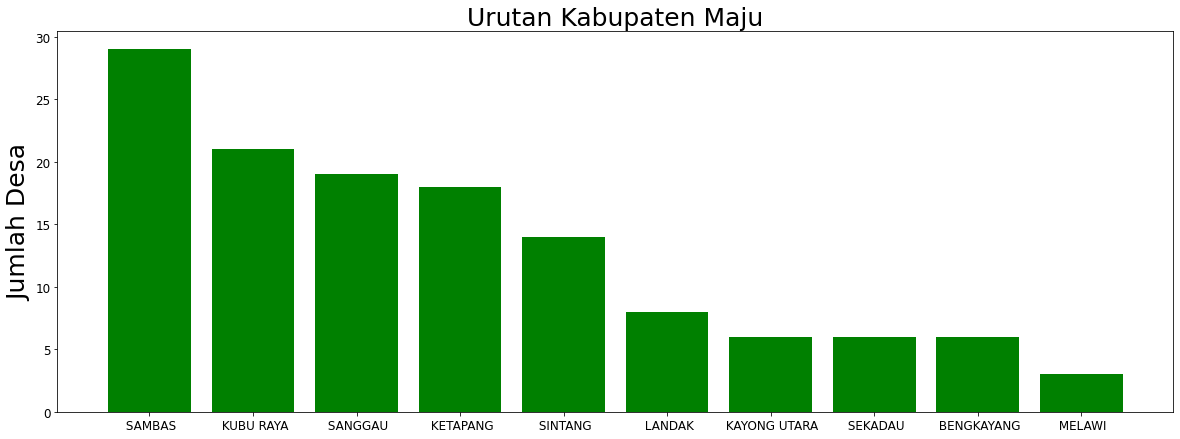

In [605]:
plt.figure(figsize=(20,7))
plt.bar(data_kabupaten, data_jumlah_predikat, color='green')
plt.title('Urutan Kabupaten Maju', size=25)
plt.ylabel('Jumlah Desa', size=25)
plt.xticks(size=12)
plt.yticks(size=12)


##### **Visualisasi BAR CHART : Urutan Kabupaten Berkembang**

In [609]:
data_visualization_raw = data_final \
                    .select("Kabupaten", "Berkembang") \
                    .distinct() \
                    .orderBy("Berkembang", ascending=False) \
                    .collect()

In [610]:
data_kabupaten = list()
data_jumlah_predikat = list()
for data in data_visualization_raw:
    data_kabupaten.append(data[0])
    data_jumlah_predikat.append(data[1])

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

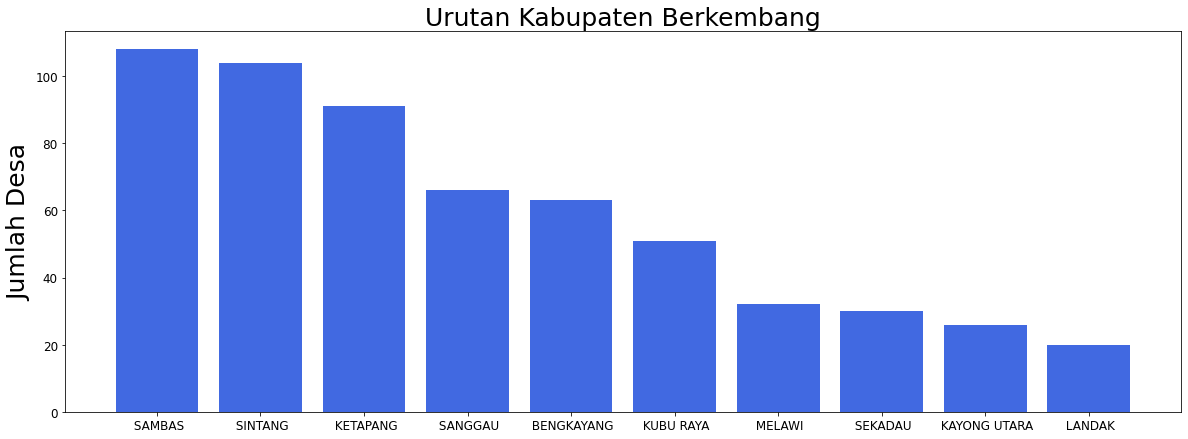

In [611]:
plt.figure(figsize=(20,7))
plt.bar(data_kabupaten, data_jumlah_predikat, color='royalblue')
plt.title('Urutan Kabupaten Berkembang', size=25)
plt.ylabel('Jumlah Desa', size=25)
plt.xticks(size=12)
plt.yticks(size=12)


##### **Visualisasi BAR CHART : Urutan Kabupaten Tertinggal**

In [665]:
data_visualization_raw = data_final \
                    .select("Kabupaten", "Tertinggal") \
                    .distinct() \
                    .orderBy("Tertinggal", ascending=False) \
                    .collect()

In [666]:
data_kabupaten = list()
data_jumlah_predikat = list()
for data in data_visualization_raw:
    data_kabupaten.append(data[0])
    data_jumlah_predikat.append(data[1])

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

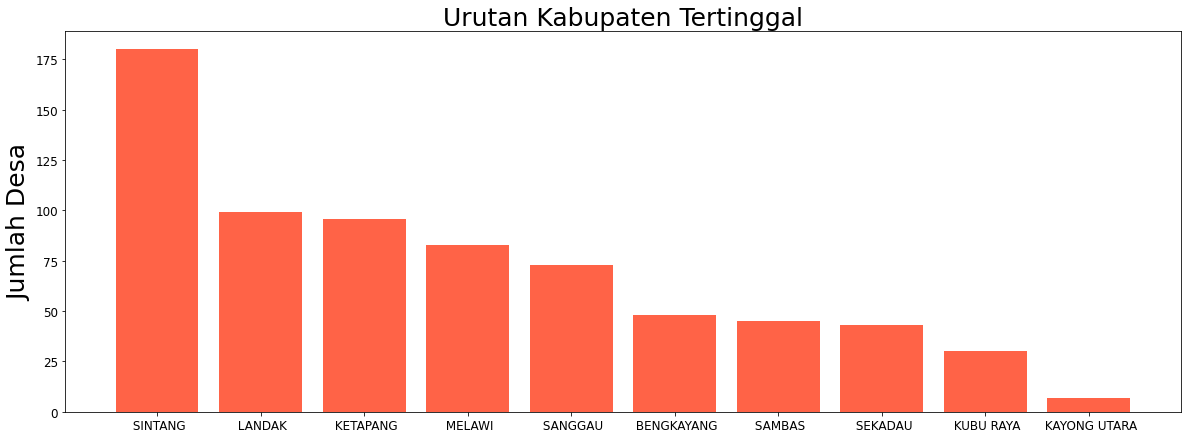

In [667]:
plt.figure(figsize=(20,7))
plt.bar(data_kabupaten, data_jumlah_predikat, color='tomato')
plt.title('Urutan Kabupaten Tertinggal', size=25)
plt.ylabel('Jumlah Desa', size=25)
plt.xticks(size=12)
plt.yticks(size=12)


##### **Visualisasi BAR CHART : Urutan Kabupaten Sangat Tertinggal**

In [673]:
data_visualization_raw = data_final \
                    .select("Kabupaten", "Sangat Tertinggal") \
                    .distinct() \
                    .orderBy("Sangat Tertinggal", ascending=False) \
                    .collect()

In [674]:
data_kabupaten = list()
data_jumlah_predikat = list()
for data in data_visualization_raw:
    data_kabupaten.append(data[0])
    data_jumlah_predikat.append(data[1])

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

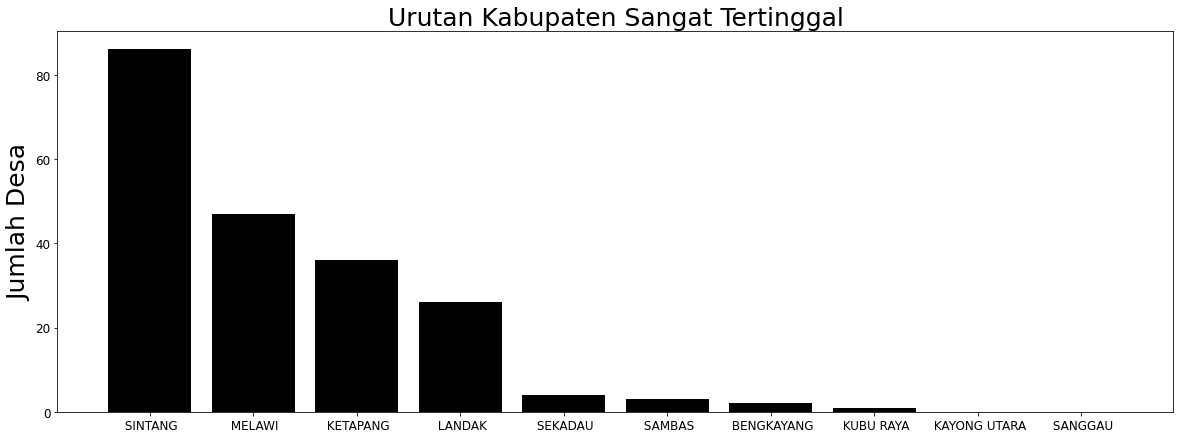

In [675]:
plt.figure(figsize=(20,7))
plt.bar(data_kabupaten, data_jumlah_predikat, color='black')
plt.title('Urutan Kabupaten Sangat Tertinggal', size=25)
plt.ylabel('Jumlah Desa', size=25)
plt.xticks(size=12)
plt.yticks(size=12)


##### **Visualisasi PIE CHART : Perbandingan Tipologi Kabupaten Sambas**

In [687]:
daftar_tipologi_raw = data_final.select("Tipologi").distinct().collect()
daftar_tipologi = list()
for data in daftar_tipologi_raw:
    daftar_tipologi.append(data[0])

data_visualization_raw = data_final.select("Kabupaten", "Tipologi").collect()
data_visualization = list()
for data in data_visualization_raw:
    if data[0] == " SAMBAS":
        data_visualization.append(data[1])

In [688]:
data_visualization

['Pesisir/Nelayan',
 'Pesisir/Nelayan',
 'Pesisir/Nelayan',
 'Kehutanan',
 'Pesisir/Nelayan',
 'Pesisir/Nelayan',
 'Pesisir/Nelayan',
 'Kehutanan',
 'Persawahan',
 'Kehutanan',
 'Kehutanan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Kehutanan',
 'Pesisir/Nelayan',
 'Persawahan',
 'Persawahan',
 'Pesisir/Nelayan',
 'Pesisir/Nelayan',
 'Pesisir/Nelayan',
 'Persawahan',
 'Persawahan',
 'Pesisir/Nelayan',
 'Persawahan',
 'Persawahan',
 'Pesisir/Nelayan',
 'Pesisir/Nelayan',
 'Pesisir/Nelayan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Pesisir/Nelayan',
 'Persawahan',
 'Persawahan',
 'Perladangan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Perindustrian/Jasa',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Perladangan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Per

In [689]:
# inisiasi dictionary dengan nilai 0
dict_data_visualization = dict.fromkeys(daftar_tipologi, 0)

In [690]:
for data in data_visualization:
    for tipologi in daftar_tipologi:
        if data == tipologi:
            dict_data_visualization[tipologi] += 1

dict_data_visualization

{'Tidak Terdefinisi': 0,
 'Persawahan': 84,
 'Pesisir/Nelayan': 42,
 'Perindustrian/Jasa': 8,
 'Perladangan': 50,
 'Peternakan': 0,
 'Pertambangan': 1,
 'Kehutanan': 8,
 'Perkebunan': 0}

In [694]:
# menghilangkan item pada dictionary jika nilainya = 0
# https://stackoverflow.com/questions/17095163/remove-a-dictionary-key-that-has-a-certain-value
dict_data_visualization = {k:v for k,v in dict_data_visualization.items() if v != 0}

In [692]:
dict_data_visualization

{'Persawahan': 84,
 'Pesisir/Nelayan': 42,
 'Perindustrian/Jasa': 8,
 'Perladangan': 50,
 'Pertambangan': 1,
 'Kehutanan': 8}

Text(0.5, 1.0, 'Perbandingan Tipologi Kabupaten SAMBAS')

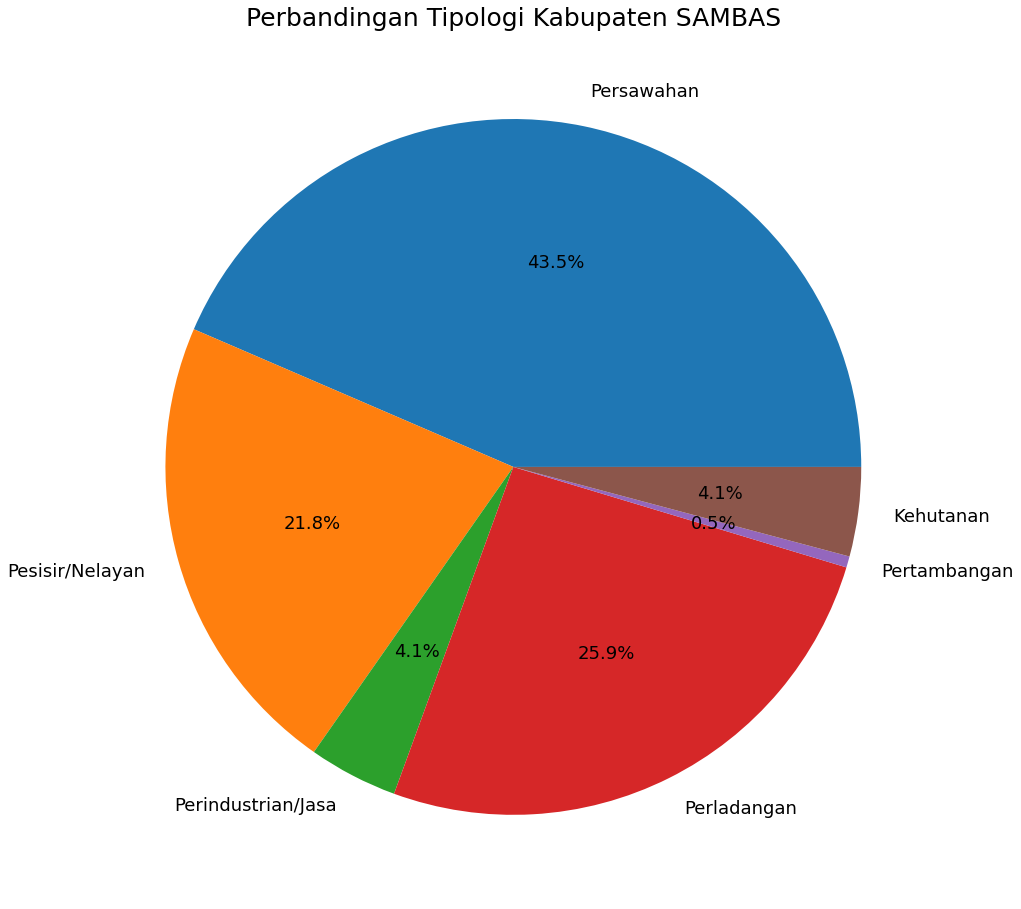

In [693]:
plt.figure(figsize=(16,16))
plt.pie(dict_data_visualization.values(), labels=dict_data_visualization.keys(), autopct='%1.1f%%', textprops={"fontsize" : 18})
plt.title('Perbandingan Tipologi Kabupaten SAMBAS', size=25)

##### **Visualisasi PIE CHART : Perbandingan Tipologi Kabupaten Sintang**

In [695]:
daftar_tipologi_raw = data_final.select("Tipologi").distinct().collect()
daftar_tipologi = list()
for data in daftar_tipologi_raw:
    daftar_tipologi.append(data[0])

data_visualization_raw = data_final.select("Kabupaten", "Tipologi").collect()
data_visualization = list()
for data in data_visualization_raw:
    if data[0] == " SINTANG":
        data_visualization.append(data[1])

In [696]:
data_visualization

['Peternakan',
 'Persawahan',
 'Kehutanan',
 'Kehutanan',
 'Peternakan',
 'Peternakan',
 'Perladangan',
 'Peternakan',
 'Perladangan',
 'Persawahan',
 'Persawahan',
 'Peternakan',
 'Peternakan',
 'Perladangan',
 'Peternakan',
 'Persawahan',
 'Kehutanan',
 'Perladangan',
 'Persawahan',
 'Persawahan',
 'Kehutanan',
 'Persawahan',
 'Kehutanan',
 'Perladangan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawahan',
 'Persawah

In [697]:
# inisiasi dictionary dengan nilai 0
dict_data_visualization = dict.fromkeys(daftar_tipologi, 0)

In [698]:
for data in data_visualization:
    for tipologi in daftar_tipologi:
        if data == tipologi:
            dict_data_visualization[tipologi] += 1

dict_data_visualization

{'Tidak Terdefinisi': 0,
 'Persawahan': 181,
 'Pesisir/Nelayan': 0,
 'Perindustrian/Jasa': 24,
 'Perladangan': 176,
 'Peternakan': 8,
 'Pertambangan': 0,
 'Kehutanan': 17,
 'Perkebunan': 0}

In [699]:
# menghilangkan item pada dictionary jika nilainya = 0
# https://stackoverflow.com/questions/17095163/remove-a-dictionary-key-that-has-a-certain-value
dict_data_visualization = {k:v for k,v in dict_data_visualization.items() if v != 0}

Text(0.5, 1.0, 'Perbandingan Tipologi Kabupaten SINTANG')

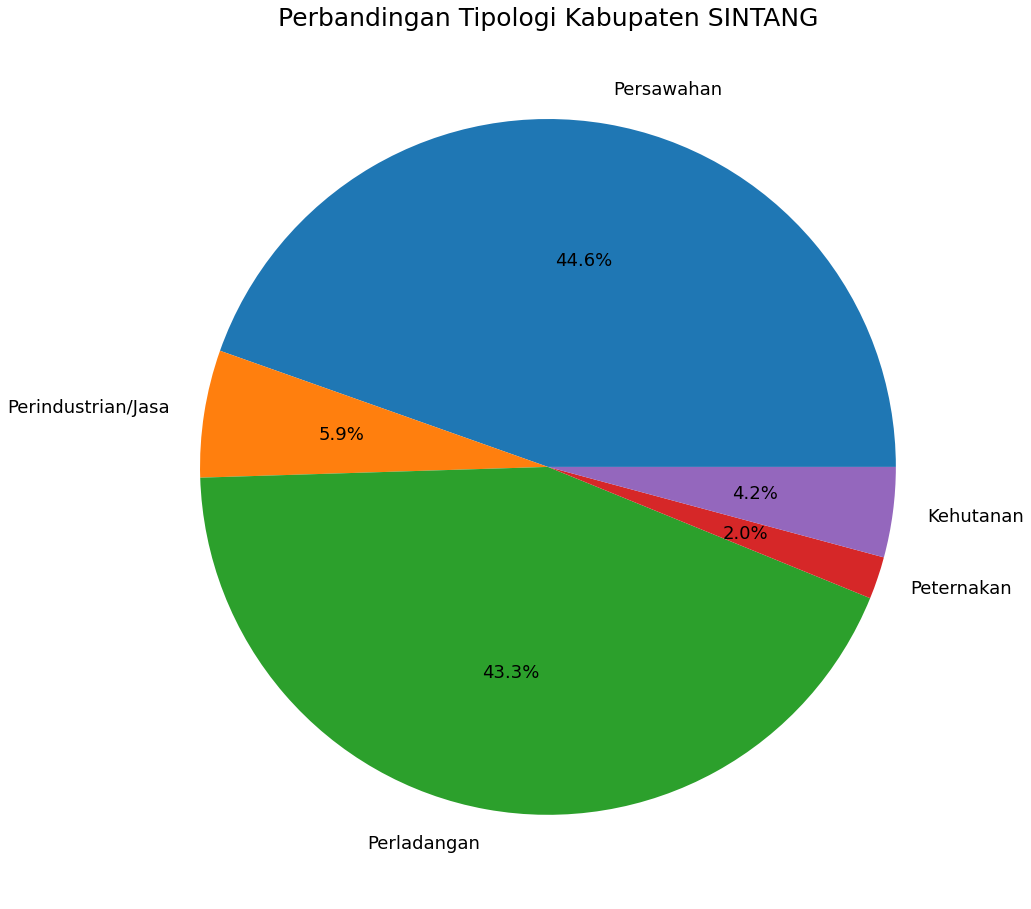

In [700]:
plt.figure(figsize=(16,16))
plt.pie(dict_data_visualization.values(), labels=dict_data_visualization.keys(), autopct='%1.1f%%', textprops={"fontsize" : 18})
plt.title('Perbandingan Tipologi Kabupaten SINTANG', size=25)

## **9. Utilization of Analysis Result**
- Banyaknya tipologi nelayan dan persawahan mempengaruhi maju dan berkembangannya suatu kabupaten **(SAMBAS)**
- Sedikitnya tipologi nelayan mempengaruhi ketertinggalan suatu kabupaten **(SINTANG)**

## **1. Business Case Evaluation**
- siapa pengguna data : pemerintahan setempat provinsi kalimantan barat
- kapan data dapat digunakan : kapan saja
- mengapa menggunakan data tersebut : informatif, bervariasi dan terjamin kebenarannya karena bersumber dari pemerintahan itu sendiri